# Introduction à l'apprentissage automatique: TP2 - Exercice 2

<br>

### Mélanges de gaussiennes et jeu de données "Old Faithful"

<br>
On va étudier un jeu de données relatif au geyser "Old Faithful" dans le parc du Yellowstone aux Etats-Unis.

Chaque observation est constituée de la durée de l'éruption et de la durée avant l'éruption suivante.


Les données sont décrites ici: 
http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat <br>
et sont disponible [sur la page web du cours](https://members.loria.fr/FSur/enseignement/apprauto/old_faithful.txt).

<br>
On commence par charger les bibliothèques qui nous seront utiles:



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

puis on charge les données du fichier `old_faithful.txt`:

In [2]:
# attention: le notebook doit être ouvert dans le même répertoire que le fichier old_faithful.txt
data=np.loadtxt('old_faithful.txt')
print(data)

[[  1.      3.6    79.   ]
 [  2.      1.8    54.   ]
 [  3.      3.333  74.   ]
 [  4.      2.283  62.   ]
 [  5.      4.533  85.   ]
 [  6.      2.883  55.   ]
 [  7.      4.7    88.   ]
 [  8.      3.6    85.   ]
 [  9.      1.95   51.   ]
 [ 10.      4.35   85.   ]
 [ 11.      1.833  54.   ]
 [ 12.      3.917  84.   ]
 [ 13.      4.2    78.   ]
 [ 14.      1.75   47.   ]
 [ 15.      4.7    83.   ]
 [ 16.      2.167  52.   ]
 [ 17.      1.75   62.   ]
 [ 18.      4.8    84.   ]
 [ 19.      1.6    52.   ]
 [ 20.      4.25   79.   ]
 [ 21.      1.8    51.   ]
 [ 22.      1.75   47.   ]
 [ 23.      3.45   78.   ]
 [ 24.      3.067  69.   ]
 [ 25.      4.533  74.   ]
 [ 26.      3.6    83.   ]
 [ 27.      1.967  55.   ]
 [ 28.      4.083  76.   ]
 [ 29.      3.85   78.   ]
 [ 30.      4.433  79.   ]
 [ 31.      4.3    73.   ]
 [ 32.      4.467  77.   ]
 [ 33.      3.367  66.   ]
 [ 34.      4.033  80.   ]
 [ 35.      3.833  74.   ]
 [ 36.      2.017  52.   ]
 [ 37.      1.867  48.   ]
 

Représentez les données par un nuage de point.


Text(0, 0.5, 'durée erruption n+1')

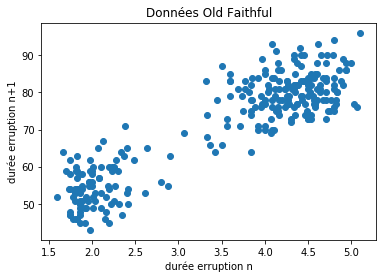

In [4]:
# votre code ici (voir code exercice 1 du TP 1)
X = [data[i][1] for i in range(len(data))]
Y = [data[i][2] for i in range(len(data))]

plt.scatter(X, Y)
plt.title('Données Old Faithful')
plt.xlabel('durée erruption n')
plt.ylabel('durée erruption n+1')

Observez l'évolution du critère BIC dans l'ajustement d'un mélange de gaussiennes à $M$ composantes, pour $M$ variant entre 1 et 10. Vous afficherez les lignes d'iso-valeur du logarithme de la densité de probabilitée estimée pour chaque valeur de $M$ en utilisant la fonction `show_mixture` ci-dessous (inspirée du code de la [documentation scikit-learn](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html)).

Les fonctions permettant de définir un mélange de gaussiennes et d'estimer ses paramètres sont disponibles sur [cette page](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

<br>

Constatez que ce geyser semble présenter deux "modes de fonctionnement". 


In [ ]:
def show_mixture(clf,X_train):
    x = np.linspace(1, 5.5)
    y = np.linspace(20., 120.)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -clf.score_samples(XX)  # score_samples est le log de la densité (log-vraisemblance) en chaque point  
    Z = Z.reshape(X.shape)
    plt.figure(figsize=[8,6])
    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                    levels=np.logspace(0, 3, 10))   # lignes d'iso-valeur
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.scatter(X_train[:, 0], X_train[:, 1])  # nuage des observations
    plt.scatter(clf.means_[:,0],clf.means_[:,1],c='red')  # moyennes en rouge
    plt.title('Negative log-likelihood predicted by a GMM, K='+str(clf.n_components))
    plt.axis('tight')
    

In [ ]:
# votre code ici


Retrouve-t-on les deux modes avec K-Means ?

In [ ]:
# votre code ici: voir le code de l'exercice 1 dans le TP 1
